In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [2]:
poke_df = pd.read_csv("pokemon.csv")

In [3]:
poke_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [5]:
poke_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
poke_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
poke_df[poke_df["Name"] == None] #なぜ７９９null valueとなっている？

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [8]:
poke_df.groupby("Type 1").size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [9]:
poke_df.groupby("Generation").size() #第六がかなり少ない。

Generation
1    166
2    106
3    160
4    121
5    165
6     82
dtype: int64

In [10]:
poke_df.groupby("Legendary").size() #ほぼ伝説はいない。

Legendary
False    735
True      65
dtype: int64

可視化の作業に移る。
それぞれの質的変数ごとにどういう傾向があるのかを見ていく。

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


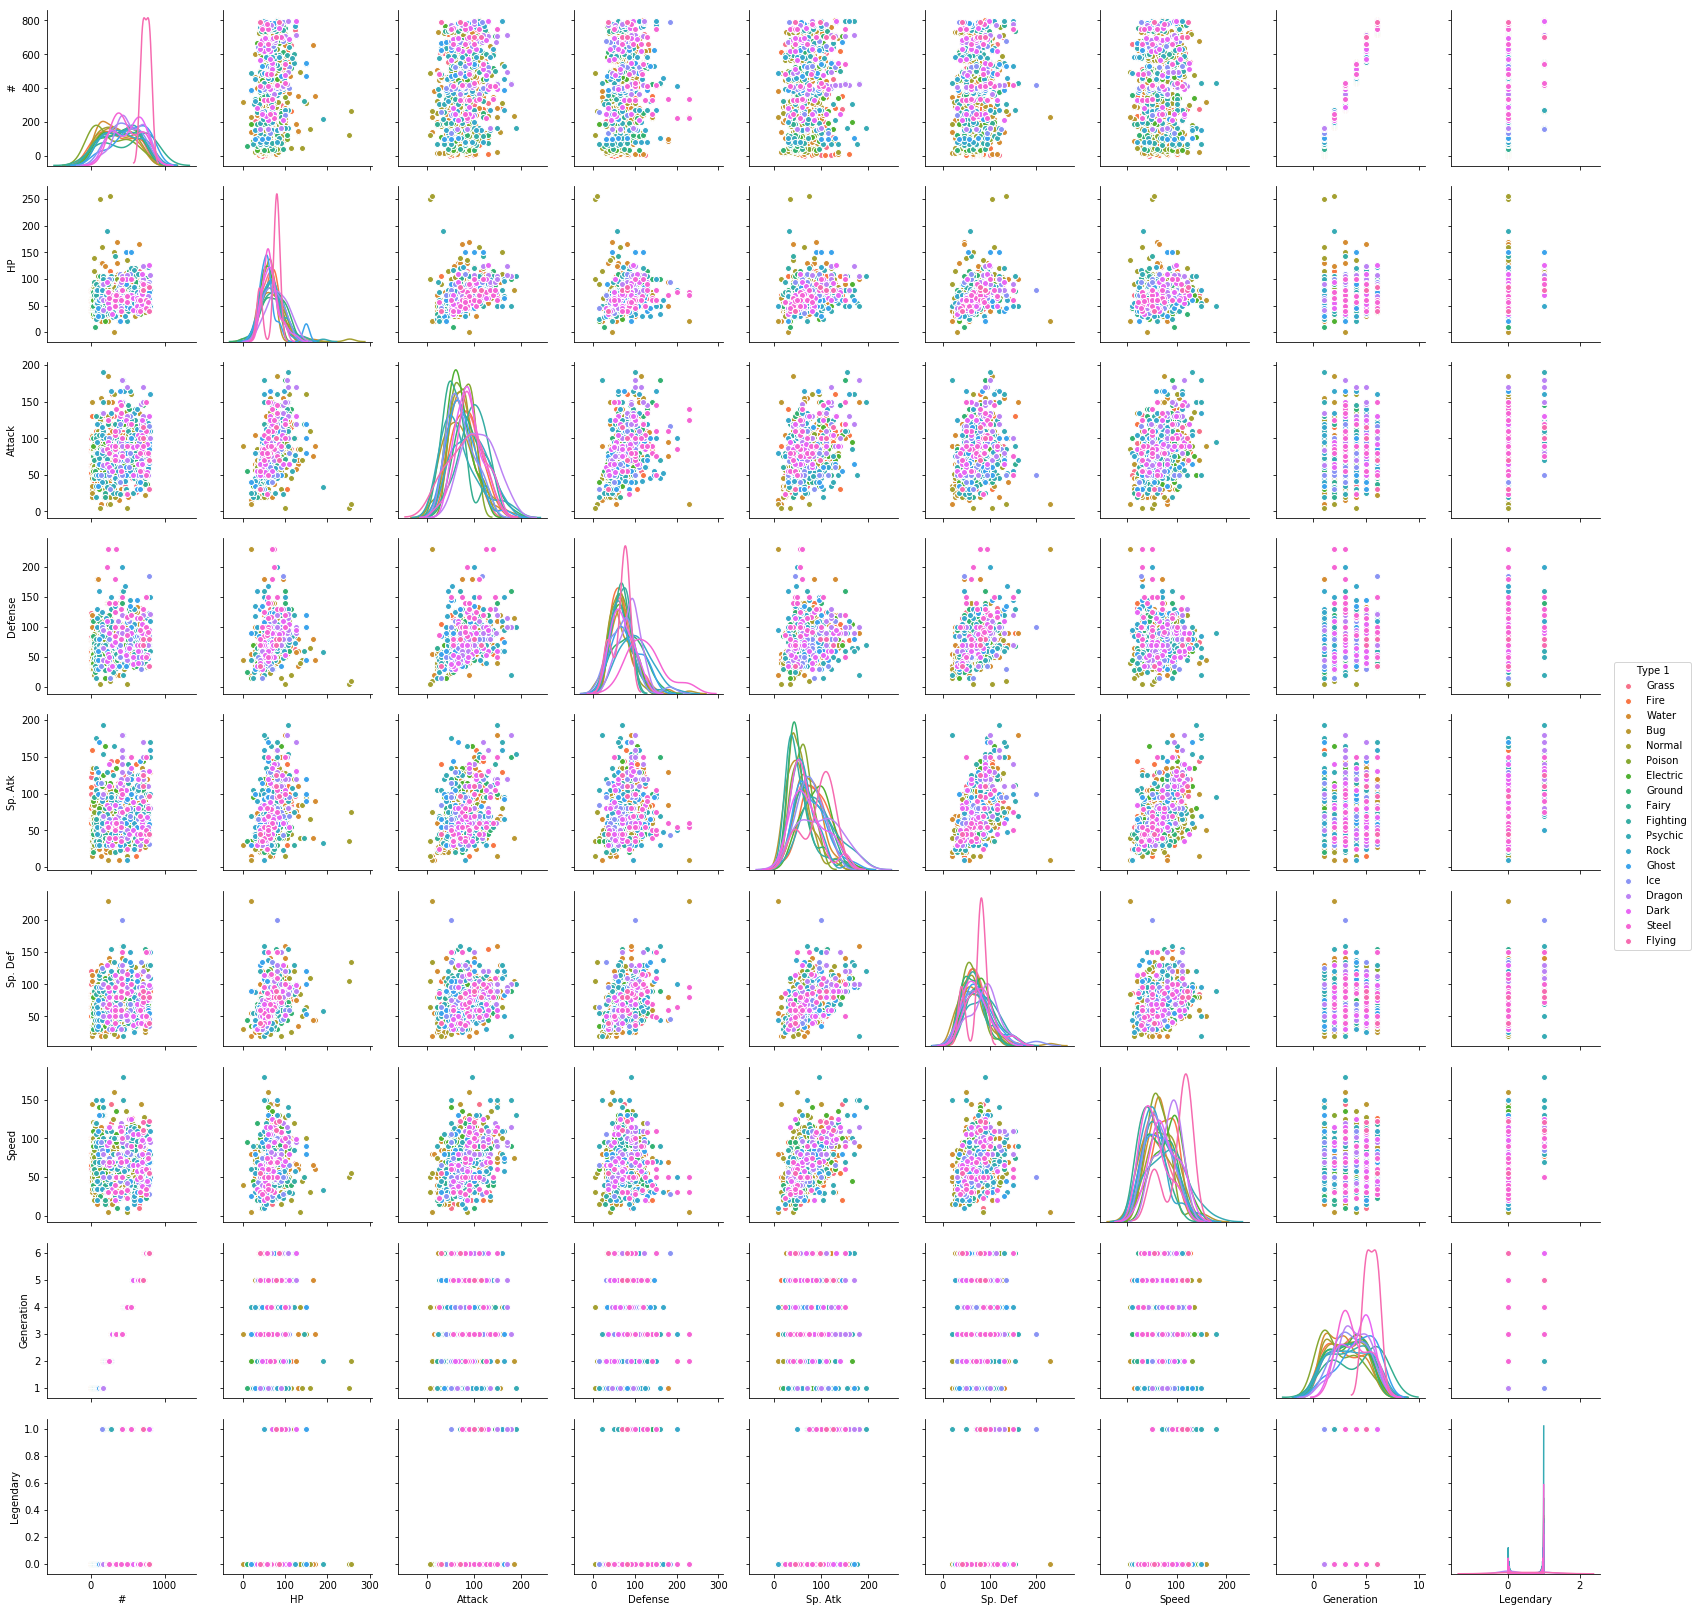

In [11]:
sns.pairplot(poke_df,hue = "Type 1",diag_kind="kde")

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


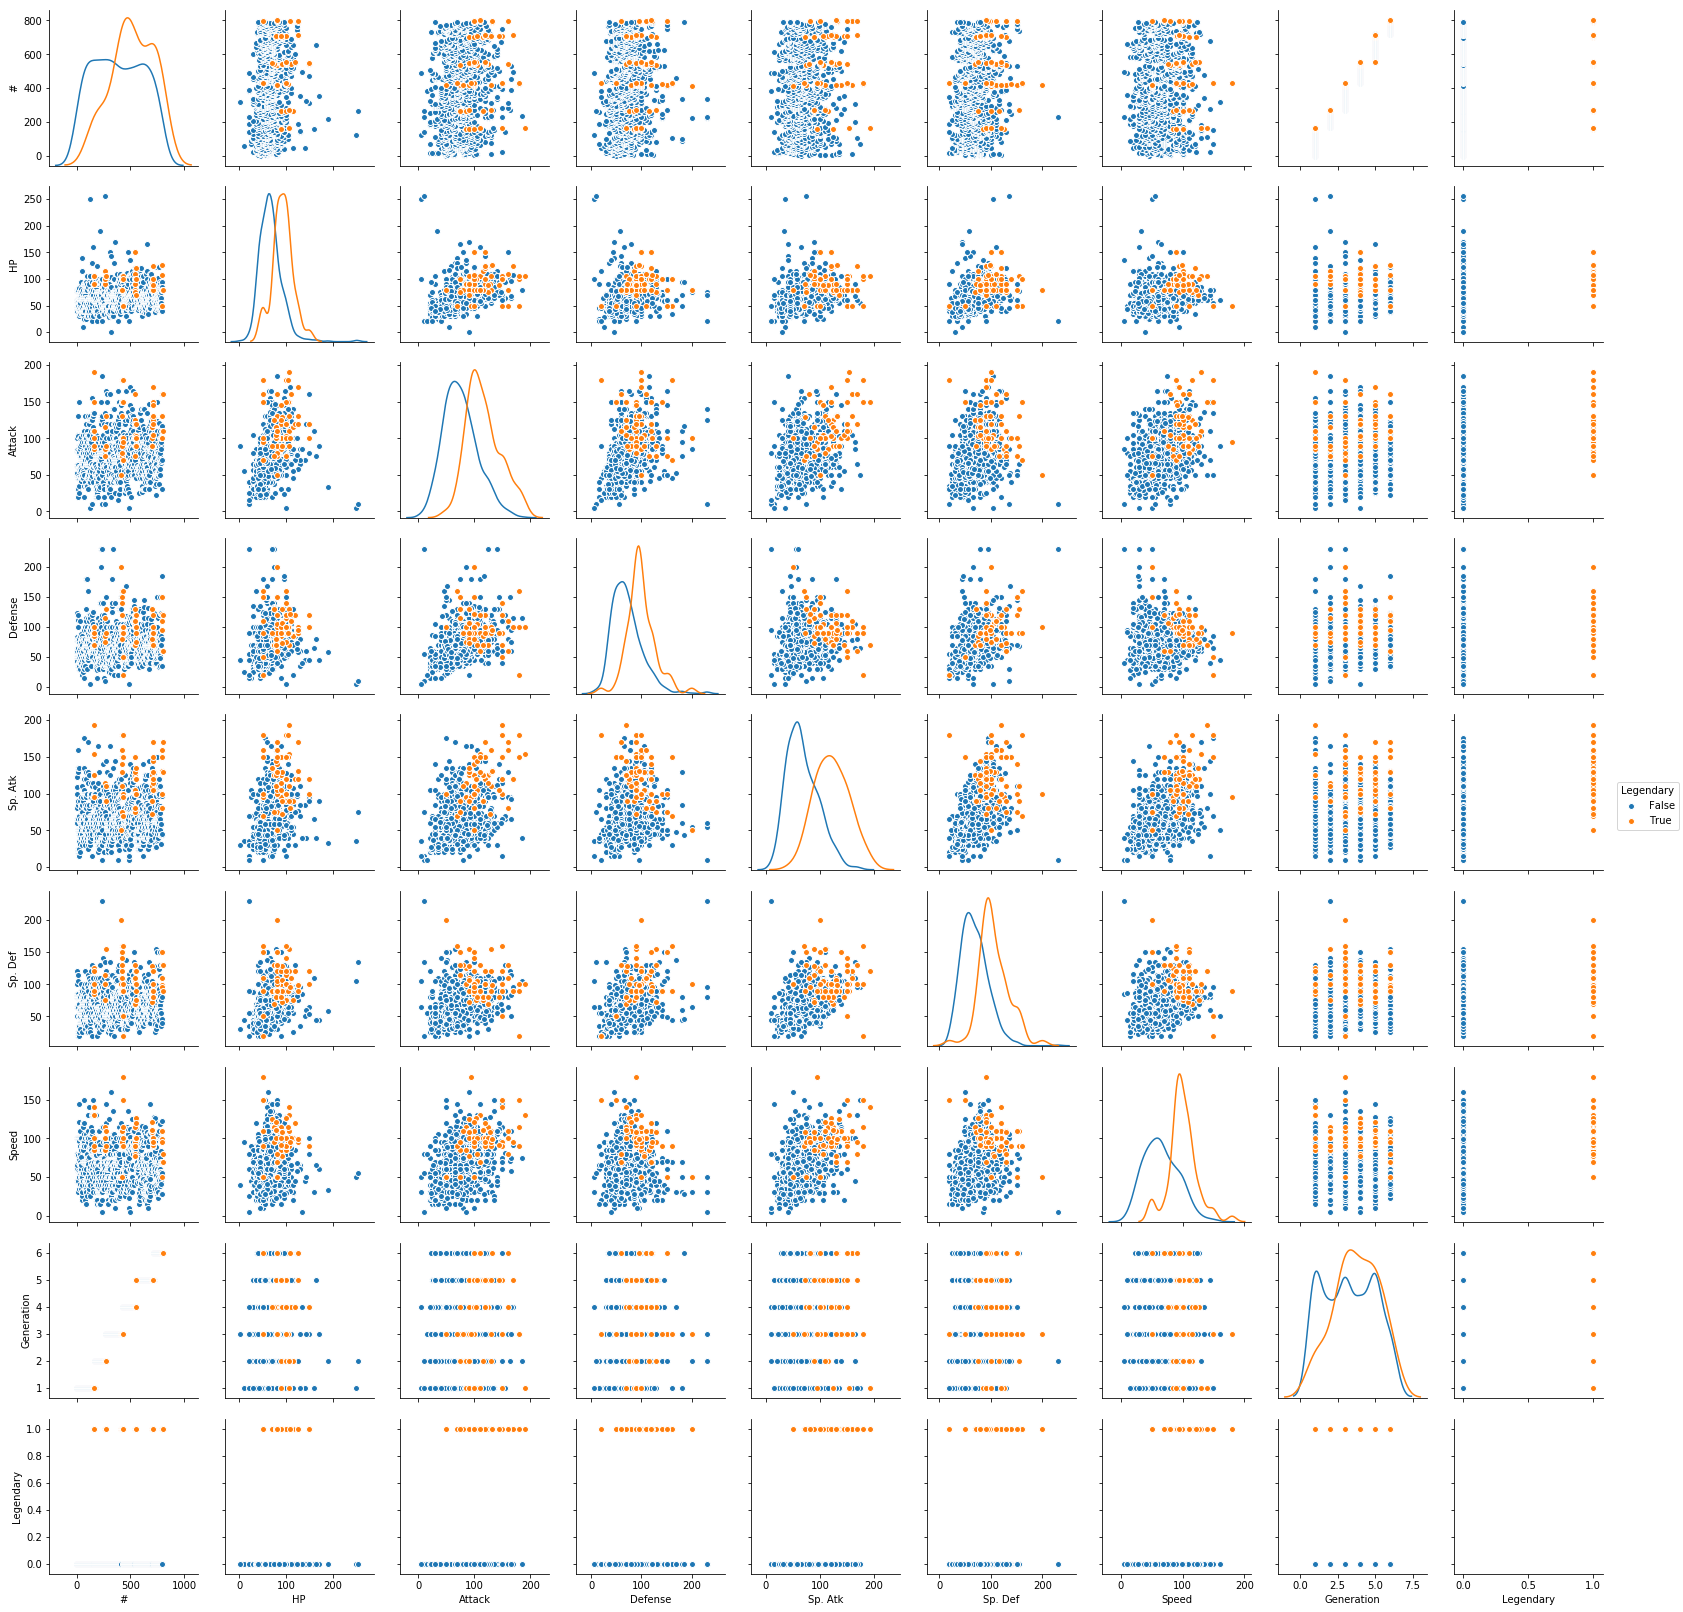

In [12]:
sns.pairplot(poke_df,hue = "Legendary",diag_kind="kde") #全体としてlegendaryがTrueの方が能力値が高い。

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


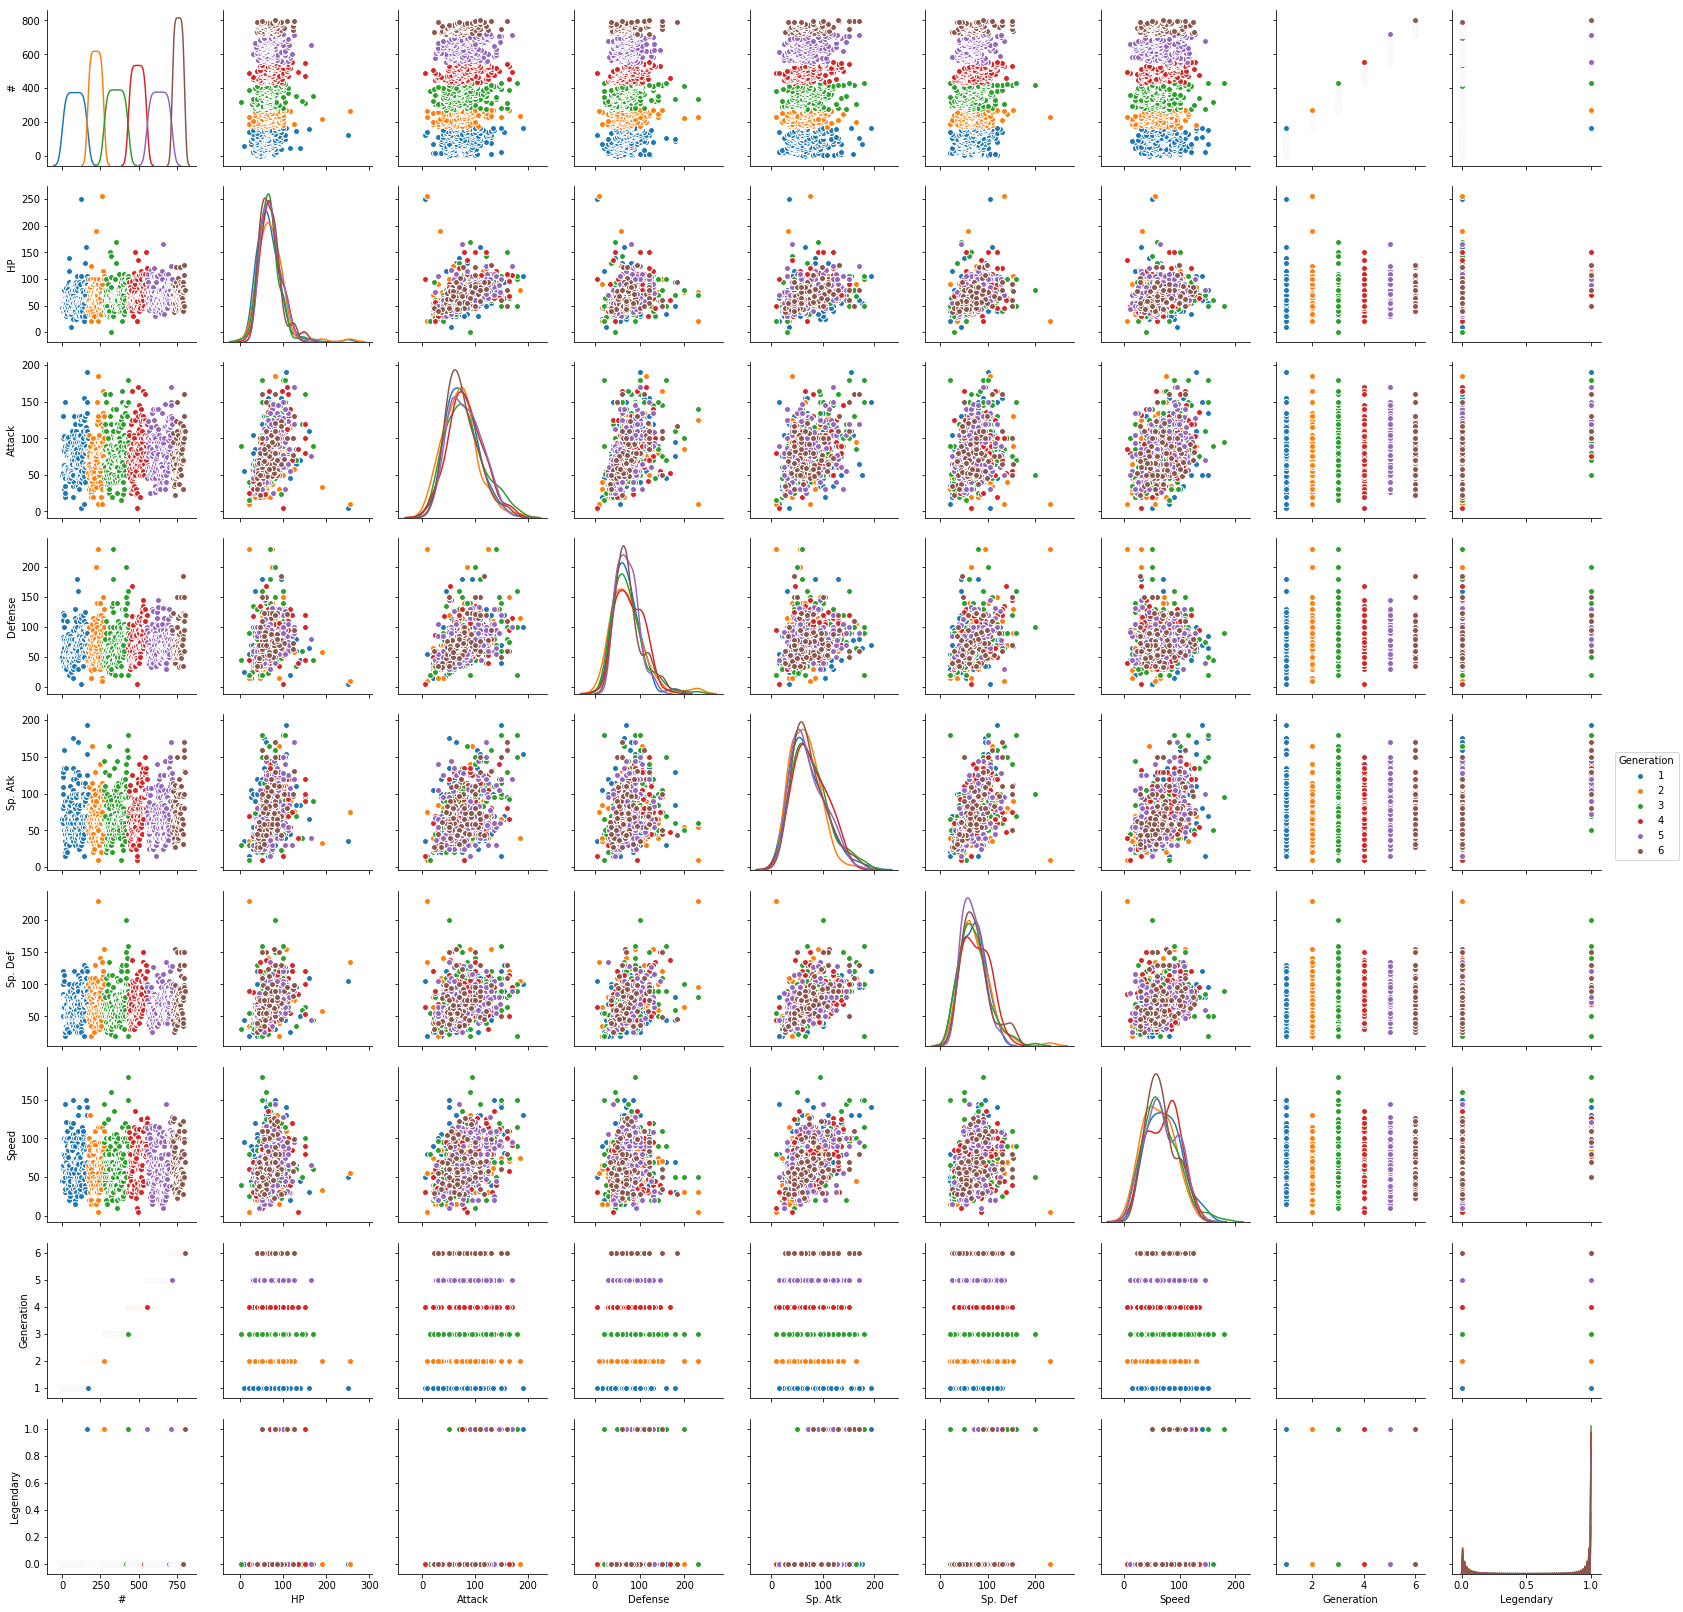

In [13]:
sns.pairplot(poke_df,hue = "Generation",diag_kind="kde") #gennerationによる違いはそれほどはなさそう。

面倒なので、とりあえず第二タイプと第一タイプを同等に取り扱ってダミー変数化することにした。

In [14]:
poke_type1 = pd.get_dummies(poke_df[ u'Type 1'])
poke_type2 = pd.get_dummies(poke_df[ u'Type 2'])
poke_gen = pd.get_dummies(poke_df[ u'Generation'])
poke_leg = pd.get_dummies(poke_df[ u'Legendary'])
#Legendary & Generationはなんかもうまとめてもいい気がしてきた（特にLegendary）
#dummy変数化は、dummy変数が取りうる値よりもひとつ少ない値しか取らない方が良いと聞いたのだがどうなのだろう。

In [15]:
poke_type = poke_type1 + poke_type2

In [16]:
poke_type.head(10) #hen hao,どうすればこれ全体をカテゴリ変数見たくできるか（）
#Typeの変数が多すぎるせいで、（18）無駄に（？）扱いづらくなっている気がする。

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
#ダミー変数を導入
poke_df = poke_df.drop(['Type 1', 'Type 2','Generation', 'Legendary'],axis =1)
poke_df = pd.concat([poke_df,poke_type,poke_gen,poke_leg],axis = 1)
poke_df.head(10) 

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,...,Steel,Water,1,2,3,4,5,6,False,True
0,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,Ivysaur,60,62,63,80,80,60,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,Venusaur,80,82,83,100,100,80,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,Mega Venusaur,80,100,123,122,120,80,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5,Charmander,39,52,43,60,50,65,0,0,...,0,0,1,0,0,0,0,0,1,0
5,6,Charmeleon,58,64,58,80,65,80,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,Charizard,78,84,78,109,85,100,0,0,...,0,0,1,0,0,0,0,0,1,0
7,8,Mega Charizard X,78,130,111,130,85,100,0,0,...,0,0,1,0,0,0,0,0,1,0
8,9,Mega Charizard Y,78,104,78,159,115,100,0,0,...,0,0,1,0,0,0,0,0,1,0
9,10,Squirtle,44,48,65,50,64,43,0,0,...,0,1,1,0,0,0,0,0,1,0


In [18]:
poke_train = pd.read_csv("train.csv")

In [19]:
poke_train.head(10)

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206
5,5,338,111,338
6,6,308,691,308
7,7,761,493,493
8,8,453,159,159
9,9,374,614,614


In [20]:
#勝った方が前者なのか後者なのかという変数（目的変数）を導入した。
pokepoke = poke_train["Second_pokemon"] == poke_train["Winner"]
pokepoke = pokepoke.replace({False:0,True:1})
#first_pokemon win : 0 ,second_pokemon win :1

In [21]:
poke_train = pd.concat([poke_train,pokepoke],axis = 1)
poke_train = poke_train.rename({0:"win"},axis = 1)
poke_train.head()

,id,First_pokemon,Second_pokemon,Winner,win
0,0,88,85,85,1
1,1,466,408,466,0
2,2,715,120,715,0
3,3,467,377,467,0
4,4,416,206,206,1


In [22]:
poke_train = poke_train.rename(columns = {"First_pokemon":"#"})
poke_train.head()

,id,#,Second_pokemon,Winner,win
0,0,88,85,85,1
1,1,466,408,466,0
2,2,715,120,715,0
3,3,467,377,467,0
4,4,416,206,206,1


In [23]:
len(poke_train)  #800*800 = 640000なので16分の一の組み合わせが入っている。

40000

In [24]:
len(poke_df)

800

In [25]:
poke_train.drop_duplicates()

,id,#,Second_pokemon,Winner,win
0,0,88,85,85,1
1,1,466,408,466,0
2,2,715,120,715,0
3,3,467,377,467,0
4,4,416,206,206,1
5,5,338,111,338,0
6,6,308,691,308,0
7,7,761,493,493,1
8,8,453,159,159,1
9,9,374,614,614,1


In [26]:
len(poke_train) # tyouhukunashi

40000

In [27]:
poke_df1 = pd.merge(poke_df,poke_train,on = "#")
poke_df1 = poke_df1.rename(columns = {'#':"First #", 'Name':"First_Name", 'Type':"First_Type", 'HP':"First_HP", 'Attack':"First_Attack",
                           'Defense':"First_Defense", 'Sp. Atk':"First_Sp.Atk",'Sp. Def':"First_Sp.Def", 'Speed':"First_speed"
                           ,'Generation':"First_Generation", 'Legendary':"First_Legendary"})
poke_df1.head()

,First #,First_Name,First_HP,First_Attack,First_Defense,First_Sp.Atk,First_Sp.Def,First_speed,Bug,Dark,...,3,4,5,6,False,True,id,Second_pokemon,Winner,win
0,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,1,0,23,579,1,0
1,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,1,0,446,351,351,1
2,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,1,0,1387,503,503,1
3,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,1,0,1600,604,604,1
4,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,1,0,2650,638,638,1


In [28]:
poke_df1 = poke_df1.rename(columns = {"Second_pokemon":"#"})
df1 = pd.merge(poke_df,poke_df1,on = "#")
df1.head()   #x:second_pokemn,y:first_pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug_x,Dark_x,...,2_y,3_y,4_y,5_y,6_y,False_y,True_y,id,Winner,win
0,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,36612,21,0
1,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,6553,25,0
2,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,2405,1,1
3,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,24181,64,0
4,1,Bulbasaur,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,15570,1,1


In [30]:
df1.columns

Index(['#', 'Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Bug_x', 'Dark_x', 'Dragon_x', 'Electric_x', 'Fairy_x', 'Fighting_x',
       'Fire_x', 'Flying_x', 'Ghost_x', 'Grass_x', 'Ground_x', 'Ice_x',
       'Normal_x', 'Poison_x', 'Psychic_x', 'Rock_x', 'Steel_x', 'Water_x',
       '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', 'False_x', 'True_x',
       'First #', 'First_Name', 'First_HP', 'First_Attack', 'First_Defense',
       'First_Sp.Atk', 'First_Sp.Def', 'First_speed', 'Bug_y', 'Dark_y',
       'Dragon_y', 'Electric_y', 'Fairy_y', 'Fighting_y', 'Fire_y', 'Flying_y',
       'Ghost_y', 'Grass_y', 'Ground_y', 'Ice_y', 'Normal_y', 'Poison_y',
       'Psychic_y', 'Rock_y', 'Steel_y', 'Water_y', '1_y', '2_y', '3_y', '4_y',
       '5_y', '6_y', 'False_y', 'True_y', 'id', 'Winner', 'win'],
      dtype='object')

In [31]:
grouped = df1.groupby("Name")["win"]
df_try = DataFrame(grouped.sum()/grouped.size()).sort_values(by='win', ascending=False)
df_try["Name"] = df_try.index
df_try1 = DataFrame(df1.groupby("Name")["win"].size())
df_try1["Name"] =  df_try1.index

In [32]:
df_try

,win,Name
Name,,
Darkrai,1.000000,Darkrai
Mega Lopunny,1.000000,Mega Lopunny
Mega Sharpedo,0.980769,Mega Sharpedo
Mega Pidgeot,0.980000,Mega Pidgeot
Scolipede,0.979592,Scolipede
Mega Aerodactyl,0.979167,Mega Aerodactyl
Meloetta Pirouette Forme,0.979167,Meloetta Pirouette Forme
Cinccino,0.978723,Cinccino
Zebstrika,0.978723,Zebstrika


In [33]:
df_try1

,win,Name
Name,,
Abomasnow,40,Abomasnow
Abra,52,Abra
Absol,57,Absol
Accelgor,56,Accelgor
Aegislash Blade Forme,47,Aegislash Blade Forme
Aegislash Shield Forme,52,Aegislash Shield Forme
Aerodactyl,62,Aerodactyl
Aggron,59,Aggron
Aipom,56,Aipom


In [34]:
df_try = pd.merge(df_try,df_try1,on="Name")
df_try.describe()

,win_x,win_y
count,783.000000,783.000000
mean,0.528015,51.034483
std,0.257489,7.318483
min,0.000000,28.000000
25%,0.325834,46.000000
50%,0.520000,51.000000
75%,0.750000,56.000000
max,1.000000,75.000000


In [35]:
pd.merge(df_try,poke_df,on="Name")

,win_x,Name,win_y,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Steel,Water,1,2,3,4,5,6,False,True
0,1.000000,Darkrai,49,550,70,90,90,135,90,125,...,0,0,0,0,0,1,0,0,0,1
1,1.000000,Mega Lopunny,50,477,65,136,94,54,96,135,...,0,0,0,0,0,1,0,0,1,0
2,0.980769,Mega Sharpedo,52,350,70,140,70,110,65,105,...,0,1,0,0,1,0,0,0,1,0
3,0.980000,Mega Pidgeot,50,24,83,80,80,135,80,121,...,0,0,1,0,0,0,0,0,1,0
4,0.979592,Scolipede,49,606,60,100,89,55,69,112,...,0,0,0,0,0,0,1,0,1,0
5,0.979167,Mega Aerodactyl,48,155,80,135,85,70,95,150,...,0,0,1,0,0,0,0,0,1,0
6,0.979167,Meloetta Pirouette Forme,48,717,100,128,90,77,77,128,...,0,0,0,0,0,0,1,0,1,0
7,0.978723,Cinccino,47,635,75,95,60,65,60,115,...,0,0,0,0,0,0,1,0,1,0
8,0.978723,Zebstrika,47,583,75,100,63,80,63,116,...,0,0,0,0,0,0,1,0,1,0
9,0.978723,Tornadus Therian Forme,47,704,79,100,80,110,90,121,...,0,0,0,0,0,0,1,0,0,1


In [36]:
poke_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Steel,Water,1,2,3,4,5,6,False,True
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,...,800.000000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,0.090000,0.06375,0.062500,...,0.061250,0.157500,0.20750,0.132500,0.20000,0.151250,0.206250,0.102500,0.91875,0.08125
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,0.286361,0.24446,0.242213,...,0.239938,0.364499,0.40577,0.339246,0.40025,0.358517,0.404865,0.303494,0.27339,0.27339
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,0.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,0.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,0.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000


In [37]:
df2 = df1.drop(["id","Name","#","First_Name","First #"],axis = 1)
df2.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug_x,Dark_x,Dragon_x,Electric_x,...,1_y,2_y,3_y,4_y,5_y,6_y,False_y,True_y,Winner,win
0,45,49,49,65,65,45,0,0,0,0,...,1,0,0,0,0,0,1,0,21,0
1,45,49,49,65,65,45,0,0,0,0,...,1,0,0,0,0,0,1,0,25,0
2,45,49,49,65,65,45,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
3,45,49,49,65,65,45,0,0,0,0,...,1,0,0,0,0,0,1,0,64,0
4,45,49,49,65,65,45,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1


In [38]:
df2.columns

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Bug_x',
       'Dark_x', 'Dragon_x', 'Electric_x', 'Fairy_x', 'Fighting_x', 'Fire_x',
       'Flying_x', 'Ghost_x', 'Grass_x', 'Ground_x', 'Ice_x', 'Normal_x',
       'Poison_x', 'Psychic_x', 'Rock_x', 'Steel_x', 'Water_x', '1_x', '2_x',
       '3_x', '4_x', '5_x', '6_x', 'False_x', 'True_x', 'First_HP',
       'First_Attack', 'First_Defense', 'First_Sp.Atk', 'First_Sp.Def',
       'First_speed', 'Bug_y', 'Dark_y', 'Dragon_y', 'Electric_y', 'Fairy_y',
       'Fighting_y', 'Fire_y', 'Flying_y', 'Ghost_y', 'Grass_y', 'Ground_y',
       'Ice_y', 'Normal_y', 'Poison_y', 'Psychic_y', 'Rock_y', 'Steel_y',
       'Water_y', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', 'False_y',
       'True_y', 'Winner', 'win'],
      dtype='object')

In [39]:
df3 = df2.drop(["Winner","win"],axis = 1)
#df3の横方向全部を指定するにはどうすればいい？

In [40]:
# 各カラムごとに正規化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3)  
X_std = scaler.fit_transform(df3)
type(X_std)

numpy.ndarray

In [41]:
# see a little
DataFrame(X_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,...,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,6.133274e-15,-7.661988e-15,-3.190659e-15,2.311207e-15,-9.709289e-16,2.190088e-16,1.233111e-14,1.123187e-14,-6.738352e-14,-1.426463e-14,...,1.967593e-17,7.691958e-16,5.664097e-15,2.681383e-16,-4.898948e-15,-4.933165e-16,1.287914e-16,-3.661960e-16,-6.830397e-16,6.867396e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.712924e+00,-2.283283e+00,-2.184091e+00,-1.917735e+00,-1.865236e+00,-2.171125e+00,-3.162582e-01,-2.620879e-01,-2.582540e-01,-2.583090e-01,...,-2.585292e-01,-4.332248e-01,-5.093193e-01,-3.939136e-01,-5.060866e-01,-4.197133e-01,-5.083849e-01,-3.345357e-01,-3.339262e+00,-2.994674e-01
25%,-7.581270e-01,-7.385433e-01,-7.611711e-01,-6.926295e-01,-7.881177e-01,-7.972078e-01,-3.162582e-01,-2.620879e-01,-2.582540e-01,-2.583090e-01,...,-2.585292e-01,-4.332248e-01,-5.093193e-01,-3.939136e-01,-5.060866e-01,-4.197133e-01,-5.083849e-01,-3.345357e-01,2.994674e-01,-2.994674e-01
50%,-1.597198e-01,-1.206473e-01,-1.287624e-01,-2.332149e-01,-7.003873e-02,-1.102491e-01,-3.162582e-01,-2.620879e-01,-2.582540e-01,-2.583090e-01,...,-2.585292e-01,-4.332248e-01,-5.093193e-01,-3.939136e-01,-5.060866e-01,-4.197133e-01,-5.083849e-01,-3.345357e-01,2.994674e-01,-2.994674e-01
75%,4.386873e-01,6.517228e-01,5.036463e-01,6.856143e-01,6.480402e-01,7.484492e-01,-3.162582e-01,-2.620879e-01,-2.582540e-01,-2.583090e-01,...,-2.585292e-01,-4.332248e-01,-5.093193e-01,-3.939136e-01,-5.060866e-01,-4.197133e-01,-5.083849e-01,-3.345357e-01,2.994674e-01,-2.994674e-01
max,7.420104e+00,3.432255e+00,4.930507e+00,3.717751e+00,5.674593e+00,3.839763e+00,3.161973e+00,3.815514e+00,3.872157e+00,3.871332e+00,...,3.868035e+00,2.308270e+00,1.963405e+00,2.538628e+00,1.975947e+00,2.382579e+00,1.967013e+00,2.989217e+00,2.994674e-01,3.339262e+00


In [42]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_std)

In [43]:
# 寄与率を出力
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[0.0602561  0.05983752 0.0297958  0.02905901 0.02447364 0.02388851
 0.02380725 0.0231321  0.02271843 0.02188146]


In [44]:
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
np.set_printoptions(threshold=np.inf)

In [45]:
# 因子負荷量を出力
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 5.29172583e-01,  6.11213001e-01,  4.78732413e-01,
         6.93460862e-01,  6.19055425e-01,  4.92746699e-01,
        -1.92472170e-01,  5.23825845e-02,  3.09547031e-01,
         2.19601332e-02, -2.12608037e-02,  5.23860887e-02,
         9.99839201e-02,  6.84829592e-02, -8.15029976e-04,
        -8.69270790e-02,  4.51776523e-03,  8.36284336e-02,
        -1.40277216e-01, -1.56956223e-01,  1.98792019e-01,
         1.90722497e-02,  1.03776221e-01, -4.91933838e-02,
        -1.09461984e-01, -8.10496713e-02,  4.02670753e-02,
         9.81366743e-02,  1.90567798e-02,  4.03736893e-02,
        -7.37808065e-01,  7.37808065e-01,  1.99281388e-01,
         2.24697516e-01,  1.71842980e-01,  2.59740432e-01,
         2.29223053e-01,  1.89305826e-01, -6.53966457e-02,
         1.77603626e-02,  1.20439374e-01,  9.11839637e-04,
        -2.39680592e-02,  1.92600750e-02,  2.35240904e-02,
         4.06037573e-02, -2.06918048e-03, -4.39797445e-02,
        -6.67991888e-04,  4.17990457e-02, -4.50295606e-0

In [46]:
Y = np.array(df2["win"])

In [47]:
#とりあえずrandom_forestに流し込んでみる。
from sklearn.tree import DecisionTreeClassifier

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_std,Y, test_size=0.2)

dtc_1 = DecisionTreeClassifier(random_state=0)

dtc_1.fit(X_1_train, y_1_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
dtc_1.score(X_1_test, y_1_test)

0.9365

In [49]:
dtc_1.feature_importances_

array([1.00263716e-02, 2.64586172e-02, 6.95420903e-03, 7.53963883e-03,
       8.21163342e-03, 3.87378113e-01, 9.24240612e-04, 1.27203699e-03,
       9.33384709e-04, 2.15088032e-03, 2.62220893e-03, 6.36923088e-04,
       9.22578587e-04, 1.55996163e-03, 8.65364905e-03, 1.74648184e-03,
       2.85193109e-03, 3.58689244e-04, 5.55157858e-03, 9.05542490e-04,
       2.49577825e-03, 3.20707855e-04, 3.40004180e-03, 1.92600411e-03,
       5.48993549e-04, 8.67010344e-04, 1.52586194e-03, 8.96104792e-04,
       1.00386311e-03, 6.91879435e-04, 5.60547544e-05, 0.00000000e+00,
       1.38900768e-02, 1.69213942e-02, 1.05373777e-02, 8.40905588e-03,
       5.54399755e-03, 4.12094755e-01, 1.31342489e-03, 1.03492644e-03,
       7.13701020e-04, 1.22552453e-03, 2.97946444e-04, 1.46515680e-03,
       6.07232098e-04, 2.75626215e-03, 4.51676802e-03, 1.36923727e-03,
       2.52326134e-03, 8.11796995e-04, 6.04837756e-03, 1.62603133e-03,
       2.79516780e-03, 9.43372023e-04, 1.24773086e-03, 1.55063920e-03,
      

In [50]:
#決定因子を降順に並べて、重要なものから順にカラムの名前を表示していくやつを作る。
df_ftr_imp = DataFrame(dtc_1.feature_importances_)
df_ftr_imp.rename({0:"ftr_imp"},axis =1,inplace = True)
df_column = DataFrame(df3.columns)
df_column.rename({0:"column"},axis = 1,inplace = True)
df_imp = pd.concat([df_column,df_ftr_imp],axis = 1)
df_importance = df_imp.sort_values(by='ftr_imp', ascending=False) 
df_importance#決定因子の中で、firstsp.atkとsp.atkがこんなに違うのはなんでだろう。

,column,ftr_imp
37,First_speed,0.412095
5,Speed,0.387378
1,Attack,0.026459
33,First_Attack,0.016921
32,First_HP,0.013890
34,First_Defense,0.010537
0,HP,0.010026
14,Ghost_x,0.008654
35,First_Sp.Atk,0.008409
4,Sp. Def,0.008212


In [51]:
np.array(df_importance["column"])

array(['First_speed', 'Speed', 'Attack', 'First_Attack', 'First_HP',
       'First_Defense', 'HP', 'Ghost_x', 'First_Sp.Atk', 'Sp. Def',
       'Sp. Atk', 'Defense', 'Normal_y', 'Normal_x', 'First_Sp.Def',
       'Ghost_y', 'Steel_x', 'Ground_x', 'Psychic_y', 'Flying_y',
       'Fairy_x', 'Ground_y', 'Psychic_x', 'Electric_x', 'Water_x',
       'Grass_x', '3_y', 'Poison_y', '1_y', 'Flying_x', 'Water_y', '3_x',
       'Fighting_y', 'Grass_y', '5_y', 'Bug_y', 'Dark_x', 'Steel_y',
       'Electric_y', '2_y', '6_y', 'Dark_y', '5_x', '4_y', 'Rock_y',
       'Dragon_x', 'Bug_x', 'Fire_x', 'Poison_x', '4_x', '2_x', 'Ice_y',
       'Dragon_y', '6_x', 'Fighting_x', 'Fire_y', '1_x', 'True_y',
       'Ice_x', 'Rock_x', 'Fairy_y', 'False_y', 'False_x', 'True_x'],
      dtype=object)

In [169]:
#どこまでを使うかは結構問題になりそう。(8割が表せれば十分と聞いたが、、、)
#正直簡単なモデルを使うならこんなに絶対いらなそう。

In [52]:
#重要でないカラムを落としてやってみる。
df4 = df3[['First_speed', 'Speed', 'Attack', 'First_Attack', 'First_Defense',
       'HP', 'First_HP', 'Sp. Atk', 'First_Sp.Atk', 'Ghost_x', 'Defense',
       'Sp. Def', 'Normal_y', 'Normal_x', 'First_Sp.Def', 'Ghost_y']]

In [53]:
#正規化
# 各カラムごとに正規化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3)  
X_std = scaler.fit_transform(df3)
type(X_std)


numpy.ndarray

In [54]:

from sklearn.tree import DecisionTreeClassifier

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_std,Y, test_size=0.2)

dtc_1 = DecisionTreeClassifier(random_state=0)

dtc_1.fit(X_1_train, y_1_train)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
dtc_1.score(X_1_test, y_1_test)

0.935625

In [59]:
#XG Boostでやってみる。
import xgboost as xgb

#RandomizedSearchCVでパラメータチューニング
param_distributions={'max_depth': sp.stats.randint(1,6),
                     'subsample': sp.stats.uniform(0.5,0.5),
                     'colsample_bytree': sp.stats.uniform(0.5,0.5)
}

xgb_model = xgb.XGBClassifier(objective="binary:logistic")
rs = RandomizedSearchCV(xgb_model,
                        param_distributions,
                        cv=10,
                        n_iter=20,
                        scoring="neg_log_loss",
                        n_jobs=1,
                        verbose=2)
rs.fit(X_1_train,y_1_train)

predict = rs.predict(X_1_test)
#スコアが見やすいよう整理
result = pd.DataFrame(rs.cv_results_)
result_scored = result.sort_values(by=["rank_test_score"])[["params","mean_test_score","std_test_score","mean_fit_time"]]

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   5.3s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   5.5s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   6.2s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   5.7s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   5.2s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984, total=   4.9s
[CV] colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018904227984 
[CV]  colsample_bytree=0.8709319211361797, max_depth=3, subsample=0.9049018

[CV]  colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193, total=   3.5s
[CV] colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193 
[CV]  colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193, total=   3.6s
[CV] colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193 
[CV]  colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193, total=   3.5s
[CV] colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193 
[CV]  colsample_bytree=0.5295937984092247, max_depth=3, subsample=0.6688979422849193, total=   3.5s
[CV] colsample_bytree=0.9263497410062647, max_depth=2, subsample=0.5928751471041951 
[CV]  colsample_bytree=0.9263497410062647, max_depth=2, subsample=0.5928751471041951, total=   4.1s
[CV] colsample_bytree=0.9263497410062647, max_depth=2, subsample=0.5928751471041951 
[CV]  colsample_bytree=0.9263497410062647, max_depth=2, subsample=0.5928751

[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, total=   1.5s
[CV] colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283 
[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, total=   2.1s
[CV] colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283 
[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, total=   1.5s
[CV] colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283 
[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, total=   1.4s
[CV] colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283 
[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, total=   1.5s
[CV] colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283 
[CV]  colsample_bytree=0.5022366788212721, max_depth=1, subsample=0.901041242181283, 

[CV]  colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733, total=   3.3s
[CV] colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733 
[CV]  colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733, total=   3.3s
[CV] colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733 
[CV]  colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733, total=   3.3s
[CV] colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733 
[CV]  colsample_bytree=0.7558136672031122, max_depth=2, subsample=0.6774135854210733, total=   3.3s
[CV] colsample_bytree=0.8209808744369356, max_depth=1, subsample=0.8284186175258466 
[CV]  colsample_bytree=0.8209808744369356, max_depth=1, subsample=0.8284186175258466, total=   1.9s
[CV] colsample_bytree=0.8209808744369356, max_depth=1, subsample=0.8284186175258466 
[CV]  colsample_bytree=0.8209808744369356, max_depth=1, subsample=0.8284186

[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, total=   2.5s
[CV] colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746 
[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, total=   2.5s
[CV] colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746 
[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, total=   2.5s
[CV] colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746 
[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, total=   2.6s
[CV] colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746 
[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, total=   2.5s
[CV] colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746 
[CV]  colsample_bytree=0.534385353972714, max_depth=2, subsample=0.7522137294189746, 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 14.2min finished
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training 

In [60]:
#evaluation
print(rs.best_estimator_)
print(predict)
np.array(result_scored.head(10))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7509592855091338, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7968014506131307)
[1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1

array([[{'colsample_bytree': 0.7509592855091338, 'max_depth': 5, 'subsample': 0.7968014506131307},
        -0.16931489705560307, 0.00912685392771353, 7.673257899284363],
       [{'colsample_bytree': 0.7319319940667763, 'max_depth': 5, 'subsample': 0.5766509756913023},
        -0.17268240073827473, 0.007781867378184677, 8.237503457069398],
       [{'colsample_bytree': 0.5468522308194783, 'max_depth': 5, 'subsample': 0.7450700115616041},
        -0.18006795385010627, 0.009973910666192925, 5.543153953552246],
       [{'colsample_bytree': 0.9253442387493378, 'max_depth': 4, 'subsample': 0.7442256859056389},
        -0.19734034390566377, 0.007636382839531851, 7.038200497627258],
       [{'colsample_bytree': 0.8450831260487087, 'max_depth': 4, 'subsample': 0.9565885749574756},
        -0.1990719385652701, 0.008305187285352972, 6.105603504180908],
       [{'colsample_bytree': 0.5962699569827092, 'max_depth': 4, 'subsample': 0.8824103799711507},
        -0.20991940428009548, 0.0095325028744809

In [61]:
#Grid Searchのもの
from xgboost.sklearn import XGBClassifier

params = {"max_depth": [5], "min_child_weight": [2]}

estimator = XGBClassifier(learning_rate=0.1, n_estimators=170, max_depth=2, min_child_weight=4, objective="binary:logistic", subsample=0.9, colsample_bytree=0.8, seed=2333)

gsearch1 = GridSearchCV(estimator, param_grid=params, n_jobs=4, iid=False, verbose=1, scoring="neg_log_loss")

gsearch1.fit(X_1_train, y_1_train)

print(pd.DataFrame(gsearch1.cv_results_))
print (gsearch1.best_params_)
print (-gsearch1.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   14.7s finished


   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0      13.802137          0.12289        -0.153252         -0.114838   

  param_max_depth param_min_child_weight  \
0               5                      2   

                                    params  rank_test_score  \
0  {'max_depth': 5, 'min_child_weight': 2}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0          -0.164271            -0.11777          -0.147306   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0           -0.114327          -0.148179           -0.112416      0.230539   

   std_score_time  std_test_score  std_train_score  
0         0.01803          0.0078         0.002215  
{'max_depth': 5, 'min_child_weight': 2}
0.15325202931475498


/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_

In [62]:
print(gsearch1.predict(X_1_test))

[1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 1 0 

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [63]:
#ada boost
#from sklearn.ensemble import AdaBoostClassifier

#AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)


In [67]:
#svr
from sklearn import svm
from sklearn import cross_validation
#データを8割をトレーニング、2割をテスト用とする
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

# サポートベクトル回帰を学習データ使って作成
reg = svm.SVR(kernel='rbf', C=1).fit(x_train, y_train)


scores = cross_validation.cross_val_score(svm.SVR(), x, y, cv=5, scoring="mean_squared_error")

scores

NameError: name 'x' is not defined

In [68]:
#NN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))

NameError: name 'X_train' is not defined